# Aplicando Python para análisis de precios: descarga, manejo y análisis de datos

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/0/0a/Python.svg" width="300px" height="100px" />

> En esta y en las siguientes dos clases veremos un caso de aplicación de simulación montecarlo en la toma de decisiones. Para lograr este objetivo, primero veremos (en esta clase) como manipular datos con *pandas*, tanto desde un archivo local de excel como remotamente desde Yahoo Finance.

> Python Data Analysis Library: pandas es una librería de código abierto, fácil de usar y que provee alto rendimiento en estructuras de datos y herramientas de análisis de datos para el lenguaje de programación Python.

**Referencias:**
- http://pandas.pydata.org/
- http://www.learndatasci.com/python-finance-part-yahoo-finance-api-pandas-matplotlib/
- https://www.datacamp.com/community/tutorials/python-excel-tutorial
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html

## 0. Motivación

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/d/d7/Philippine-stock-market-board.jpg" width="400px" height="125px" />

Hace menos de una década, los instrumentos financieros estaban en la cúspide de la popularidad. Las instituciones financieras de todo el mundo estaban negociando miles de millones de dólares de estos instrumentos a diario, y los analistas cuantitativos estaban modelándolos utilizando el cálculo estocástico y el poderoso `C++`.

Sin embargo, el avance en los últimos años ha sido impresionante y las cosas han cambiado. Por una parte, la [crisis financiera del 2008](https://es.wikipedia.org/wiki/Crisis_financiera_de_2008) fue producida por los instrumentos financieros llamados *derivados*. Por otra parte, los volúmenes transaccionales han bajado y la demanda de modelado con `C++` se ha marchitado con ellos. Además, un nuevo jugador entró en la competencia... `¡Python!`

`Python` ha estado ganando muchos seguidores en la industria financiera en los últimos años y con razón. No en vano, junto a `R` son los lenguajes de programación más utilizados en cuanto a análisis financiero.

## 1. Descarga de datos de Yahoo! Finance
Para esto utilizaremos el paquete *pandas_datareader*.

**Nota**: Usualmente, las distribuciones de Python no cuentan, por defecto, con el paquete *pandas_datareader*. Por lo que será necesario instalarlo aparte:
- buscar en inicio "Anaconda prompt" y ejecutarlo como administrador;
- el siguiente comando instala el paquete en Anaconda: *conda install pandas-datareader*;
- una vez finalice la instalación correr el comando: *conda list*, y buscar que sí se haya instalado pandas-datareader

In [1]:
# Importar el modulo data del paquete pandas_datareader. 
# La comunidad lo importa con el nombre de web
import pandas_datareader.data as web

In [2]:
# Librerías estándar para arreglos y gráficos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Primero importaremos datos desde un archivo con extensión `.csv`

In [3]:
#Importar datos de un archivo csv
datos_Tesla = pd.read_csv('TSLA.csv')
datos_Tesla

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-04-14,50.599998,51.368000,50.209999,50.372002,50.372002,20661000
1,2016-04-15,50.262001,50.919998,49.824001,50.902000,50.902000,18762000
2,2016-04-18,50.445999,51.661999,50.332001,50.776001,50.776001,21357000
3,2016-04-19,50.624001,50.874001,48.250000,49.473999,49.473999,31787500
4,2016-04-20,49.251999,50.731998,48.299999,49.993999,49.993999,25970500
...,...,...,...,...,...,...,...
1253,2021-04-07,687.000000,691.380005,667.840027,670.969971,670.969971,26309400
1254,2021-04-08,677.380005,689.549988,671.650024,683.799988,683.799988,23924300
1255,2021-04-09,677.770020,680.969971,669.429993,677.020020,677.020020,21402600
1256,2021-04-12,685.700012,704.799988,682.090027,701.979980,701.979980,29135700


Ahora lo haremos desde Yahoo Finance

In [4]:
help(web.DataReader)
#datos_TSLA = web.DataReader()

Help on function DataReader in module pandas_datareader.data:

DataReader(name, data_source=None, start=None, end=None, retry_count=3, pause=0.1, session=None, api_key=None)
    Imports data from a number of online sources.
    
    Currently supports Google Finance, St. Louis FED (FRED),
    and Kenneth French's data library, among others.
    
    Parameters
    ----------
    name : str or list of strs
        the name of the dataset. Some data sources (IEX, fred) will
        accept a list of names.
    data_source: {str, None}
        the data source ("iex", "fred", "ff")
    start : string, int, date, datetime, Timestamp
        left boundary for range (defaults to 1/1/2010)
    end : string, int, date, datetime, Timestamp
        right boundary for range (defaults to today)
    retry_count : {int, 3}
        Number of times to retry query request.
    pause : {numeric, 0.001}
        Time, in seconds, to pause between consecutive queries of chunks. If
        single value given 

In [5]:
datos_TSLA = web.DataReader('TSLA', 'yahoo', '2016-04-14', '2021-04-13')
datos_TSLA['Adj Close']

Date
2016-04-14     50.372002
2016-04-15     50.902000
2016-04-18     50.776001
2016-04-19     49.473999
2016-04-20     49.993999
                 ...    
2021-04-07    670.969971
2021-04-08    683.799988
2021-04-09    677.020020
2021-04-12    701.979980
2021-04-13    762.320007
Name: Adj Close, Length: 1258, dtype: float64

In [6]:
# Escribir una función para generalizar la importación desde Yahoo
def get_closes(names, start, end):
    close = web.DataReader(names, 'yahoo', start, end)
    return close['Adj Close']

In [7]:
# Instrumentos a descargar 
names = ['GC=F', 'BABAN.MX', 'HOTEL.MX', 'BIMBOA.MX']

# Fechas: inicios 2017 a finales de 2020
start = '2017-01-01'
end = '2020-12-31'

In [8]:
# Obtenemos los precios ajustados en el cierre
datos = get_closes(names, start, end)
datos

Symbols,GC=F,BABAN.MX,HOTEL.MX,BIMBOA.MX
Date,,,,
2017-01-02,NaN,1816.000000,9.29,45.192627
2017-01-03,1160.400024,1870.000000,9.30,44.644669
2017-01-04,1163.800049,1942.000000,9.30,45.221470
2017-01-05,1179.699951,2030.000000,9.30,45.461807
2017-01-06,1171.900024,2000.000000,9.30,45.779053
...,...,...,...,...
2020-12-24,NaN,4421.000000,4.27,42.590000
2020-12-28,1877.199951,4462.839844,4.27,43.070000
2020-12-29,1879.699951,4735.709961,4.33,43.709999


¿Cómo lucen estos datos?

<AxesSubplot:xlabel='Date'>

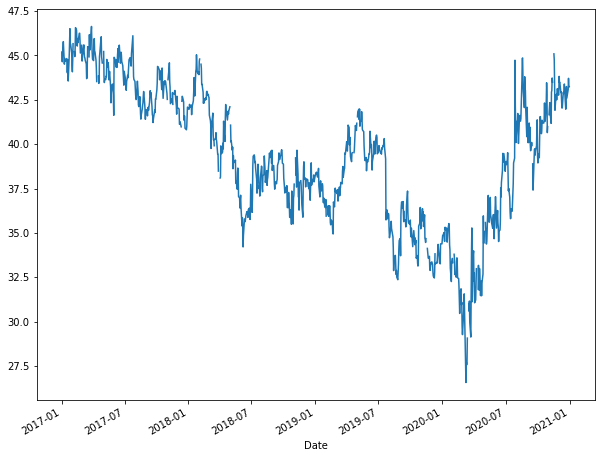

In [28]:
# Graficar
datos['BIMBOA.MX'].plot(figsize=(10,8))

Una vez tenemos los datos, podemos operar con ellos. Por ejemplo un resumen de datos estadísticos se podría obtener con

In [10]:
# Método describe
datos.describe()

Symbols,GC=F,BABAN.MX,HOTEL.MX,BIMBOA.MX
count,996.000000,1005.000000,1005.000000,1005.000000
mean,1423.563755,3639.723928,7.773861,39.349561
std,228.066230,1061.184212,2.633404,3.950653
min,1160.400024,1816.000000,3.760000,26.563566
25%,1261.374969,3041.540039,5.230000,36.330002
50%,1313.949951,3415.050049,8.130000,39.480000
75%,1527.974976,4070.899902,10.390000,42.668297
max,2051.500000,6701.049805,11.170000,46.634644


## 2. Rendimientos diarios

Para una sucesión de precios $\{S_t\}_{t=0}^{n}$, el rendimiento simple $R_t$ se define como el el cambio porcentual
$$
R_t=\frac{S_t-S_{t-1}}{S_{t-1}}
$$
para $t=1,\ldots,n$.

Para el ejemplo en curso, ¿cómo calcular esto?

In [19]:
# Método shift
datos.shift()

Symbols,GC=F,BABAN.MX,HOTEL.MX,BIMBOA.MX
Date,,,,
2017-01-02,NaN,NaN,NaN,NaN
2017-01-03,NaN,1816.000000,9.29,45.192627
2017-01-04,1160.400024,1870.000000,9.30,44.644669
2017-01-05,1163.800049,1942.000000,9.30,45.221470
2017-01-06,1179.699951,2030.000000,9.30,45.461807
...,...,...,...,...
2020-12-24,1874.699951,5143.660156,4.27,43.250000
2020-12-28,NaN,4421.000000,4.27,42.590000
2020-12-29,1877.199951,4462.839844,4.27,43.070000


In [20]:
# Entonces los rendimientos se calculan como
rendi = (datos - datos.shift())/datos.shift()
rendi

Symbols,GC=F,BABAN.MX,HOTEL.MX,BIMBOA.MX
Date,,,,
2017-01-02,NaN,NaN,NaN,NaN
2017-01-03,NaN,0.029736,0.001076,-0.012125
2017-01-04,0.002930,0.038503,0.000000,0.012920
2017-01-05,0.013662,0.045314,0.000000,0.005315
2017-01-06,-0.006612,-0.014778,0.000000,0.006978
...,...,...,...,...
2020-12-24,NaN,-0.140495,0.000000,-0.015260
2020-12-28,NaN,0.009464,0.000000,0.011270
2020-12-29,0.001332,0.061143,0.014052,0.014860


In [23]:
# Método pct_change (Este método es exactamente igual a la ecuación de la celda anterior)
datos.pct_change()

Symbols,GC=F,BABAN.MX,HOTEL.MX,BIMBOA.MX
Date,,,,
2017-01-02,NaN,NaN,NaN,NaN
2017-01-03,NaN,0.029736,0.001076,-0.012125
2017-01-04,0.002930,0.038503,0.000000,0.012920
2017-01-05,0.013662,0.045314,0.000000,0.005315
2017-01-06,-0.006612,-0.014778,0.000000,0.006978
...,...,...,...,...
2020-12-24,0.000000,-0.140495,0.000000,-0.015260
2020-12-28,0.001334,0.009464,0.000000,0.011270
2020-12-29,0.001332,0.061143,0.014052,0.014860


y la gráfica de los rendimientos se puede obtener como...

<AxesSubplot:xlabel='Date'>

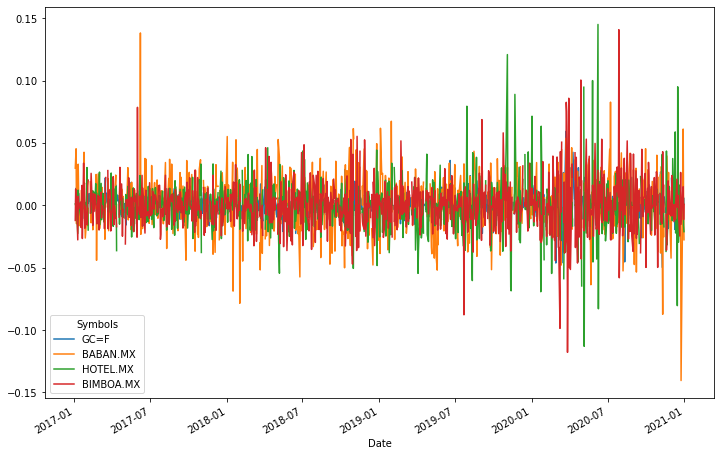

In [22]:
# Gráfica
rendi.plot(figsize=(12,8))

Donde se observa que el rendimiento tiene una tendencia constante y, por tanto, se puede plantear la hipótesis de que se puede modelar usando un proceso estocástico estacionario en media.

Otro rendimiento usado con frecuencia es el rendimiento continuamente compuesto o rendimiento logaritmico. Éste, está definido como

$$
r_t=\ln\left(\frac{S_t}{S_{t-1}}\right).
$$

**Esta ecuación sólo es válida cuando se tienen periodos cortos de tiempo**
Es fácil darse cuenta que $r_t=\ln(1+R_t)$.

**Nota:** ver gráficamente que si $0\leq|x|\ll 1$, entonces $\ln(1+x)\approx x$.

Para este caso, la fórmula del rendimiento continuamente compuesto se translada facilmente a código Python (obtener, graficar y comparar).

In [24]:
# Rendimiento logarítmico
rendi_log = np.log(datos/datos.shift())
rendi_log

Symbols,GC=F,BABAN.MX,HOTEL.MX,BIMBOA.MX
Date,,,,
2017-01-02,NaN,NaN,NaN,NaN
2017-01-03,NaN,0.029302,0.001076,-0.012199
2017-01-04,0.002926,0.037780,0.000000,0.012837
2017-01-05,0.013570,0.044317,0.000000,0.005301
2017-01-06,-0.006634,-0.014889,0.000000,0.006954
...,...,...,...,...
2020-12-24,NaN,-0.151399,0.000000,-0.015378
2020-12-28,NaN,0.009419,0.000000,0.011207
2020-12-29,0.001331,0.059346,0.013954,0.014750


<AxesSubplot:xlabel='Date'>

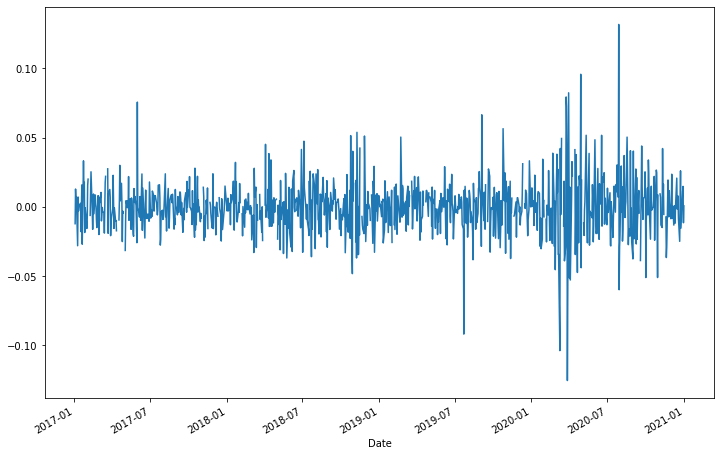

In [27]:
# Gráfica
rendi_log['BIMBOA.MX'].plot(figsize=(12,8))

In [26]:
# Valor absoluto de la diferencia
np.abs(rendi-rendi_log)

Symbols,GC=F,BABAN.MX,HOTEL.MX,BIMBOA.MX
Date,,,,
2017-01-02,NaN,NaN,NaN,NaN
2017-01-03,NaN,0.000434,5.789578e-07,7.410685e-05
2017-01-04,4.284216e-06,0.000723,0.000000e+00,8.274896e-05
2017-01-05,9.248450e-05,0.000997,0.000000e+00,1.407304e-05
2017-01-06,2.195470e-05,0.000110,0.000000e+00,2.423555e-05
...,...,...,...,...
2020-12-24,NaN,0.010904,0.000000e+00,1.176338e-04
2020-12-28,NaN,0.000045,0.000000e+00,6.303598e-05
2020-12-29,8.860201e-07,0.001796,9.780729e-05,1.093210e-04


Donde se observa que el rendimiento tiene una tendencia constante y, por tanto, se puede plantear la hipótesis de que se puede modelar usando un proceso estocástico estacionario en media.

Podemos incluso plantear la hipótesis de que los log rendimientos son normales...

In [30]:
# Media (promedio) y volatilidad de rendimientos
media = rendi.mean()   # mu
media

Symbols
GC=F         0.000528
BABAN.MX     0.001284
HOTEL.MX    -0.000619
BIMBOA.MX   -0.000002
dtype: float64

In [33]:
media[['GC=F', 'HOTEL.MX']]

Symbols
GC=F        0.000528
HOTEL.MX   -0.000619
dtype: float64

In [34]:
# Desviación estándar (volatilidad)
sigma = rendi.std()
sigma

Symbols
GC=F         0.008972
BABAN.MX     0.020930
HOTEL.MX     0.018700
BIMBOA.MX    0.019267
dtype: float64

___
Recapitulando, hoy aprendimos a obtener datos con pandas-datareader directamente desde un archivo local ó fuentes remotas.

Por otra parte, estudiamos los rendimientos diarios y dimos con la conclusión de que se podrían modelar como un proceso estocástico estacionario normal (gaussiana).

La siguiente clase veremos como simular escenarios de comportamiento de los precios futuros (no determinístico, no sabemos como se comporta, muchas posibilidades: montecarlo) a partir de datos de ingresos diarios.

Luego, con esas predicciones veremos la probabilidad de que el precio de las acciones quede por encima (debajo) de cierto umbral y con ello tomar decisiones de vender (comprar) estas acciones.

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Cristian Camilo Zapata Zuluaga.
</footer>